In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
%matplotlib inline
np.random.seed(7)
amazon=("/Users/ananya/Downloads/consumer-reviews-of-amazon-products/1429_1.csv")
amazon_df = pd.read_csv(amazon)

In [19]:
amazon_df.describe()
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
data_clean = amazon_df.dropna(subset=["reviews.rating"])
data_clean["reviews.rating"]=data_clean["reviews.rating"].astype(int)

In [37]:
split =StratifiedShuffleSplit(n_splits=5,test_size=0.4)
for train_index,test_index in split.split(data_clean,data_clean["reviews.rating"]):
    train_data =data_clean.reindex(train_index)
    test_data = data_clean.reindex(test_index)

In [42]:
len(train_data)
#train_data["reviews.rating"].value_counts()/len(train_data)

20776

13851

In [43]:
len(test_data)

13851

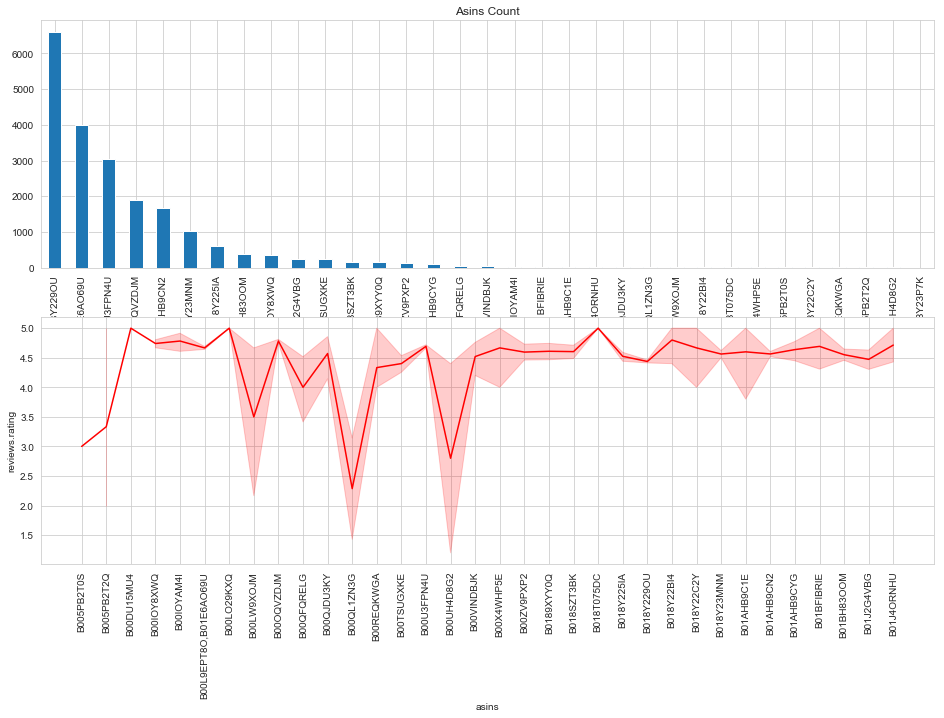

In [61]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
train_data["asins"].value_counts().plot(kind="bar", ax=ax1, title="Asins Count")
sns.lineplot(x="asins", y="reviews.rating", color="red", data=test_data)
plt.xticks(rotation=90)
plt.show()

In [64]:
correlation_matrix = train_data.corr()
correlation_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.031984,NaN,NaN
reviews.rating,NaN,-0.031984,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [75]:
Asin_count = train_data["asins"].value_counts().to_frame()
Asin_count


,asins
B018Y229OU,6596
"B00L9EPT8O,B01E6AO69U",3991
B00U3FPN4U,3053
B00OQVZDJM,1881
B01AHB9CN2,1674
B018Y23MNM,1017
B018Y225IA,609
B01BH83OOM,373
B00IOY8XWQ,360
B01J2G4VBG,237


In [70]:
avg_rating = train_data.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.250000
B005PB2T2Q,4.000000
B00IOY8XWQ,4.722222
B00IOYAM4I,4.928571
"B00L9EPT8O,B01E6AO69U",4.674267
B00LW9XOJM,4.285714
B00OQVZDJM,4.765019
B00QFQRELG,4.340909
B00QJDU3KY,4.750000


In [87]:
data_frame = Asin_count.join(avg_rating)
data_frame

,asins,reviews.rating
B018Y229OU,6596,4.465585
"B00L9EPT8O,B01E6AO69U",3991,4.674267
B00U3FPN4U,3053,4.716672
B00OQVZDJM,1881,4.765019
B01AHB9CN2,1674,4.602151
B018Y23MNM,1017,4.503441
B018Y225IA,609,4.490969
B01BH83OOM,373,4.517426
B00IOY8XWQ,360,4.722222
B01J2G4VBG,237,4.417722


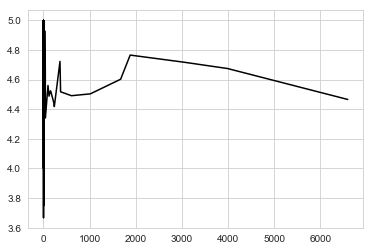

In [95]:
plt.plot("asins","reviews.rating", color="black", data=data_frame)

In [107]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
train_data["Sentiment"] = train_data["reviews.rating"].apply(sentiments)
test_data["Sentiment"] = test_data["reviews.rating"].apply(sentiments)


In [102]:
train_data["Sentiment"][1:20]

18718    Positive
3568     Positive
26596    Positive
9777     Positive
12480     Neutral
17272    Positive
24171    Positive
20634    Positive
18574    Positive
23085    Positive
11852     Neutral
8663     Positive
5125     Positive
10838    Positive
30476    Positive
30241    Positive
20945    Positive
1618     Positive
27000    Positive
Name: Sentiment, dtype: object

In [111]:
Train = train_data["reviews.text"]
Train_sentiment = train_data["Sentiment"]
Test = test_data["reviews.text"]
Test_sentiment = test_data["Sentiment"]
Train = Train.fillna(' ')
Test = Test.fillna(' ')
Train_sentiment = Train_sentiment.fillna(' ')
Test_sentiment = Test_sentiment.fillna(' ')
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
Train_counts = count_vect.fit_transform(Train) 
Train_counts.shape
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
Train_tfidf = tfidf_transformer.fit_transform(Train_counts)
Train_tfidf.shape

(20776, 10937)

In [113]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
clf_linearSVC = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC.fit(Train, Train_sentiment)

predictedLinearSVC = clf_linearSVC.predict(Test)
np.mean(predictedLinearSVC == Test_sentiment)

0.932640242581763

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest.fit(Train, Train_sentiment)

import numpy as np
predictedrandomForest = clf_randomForest.predict(Test)
np.mean(predictedrandomForest == Test_sentiment)

0.9303299400765288

In [130]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC = GridSearchCV(clf_linearSVC, parameters, n_jobs=-1)
gs_clf_LinearSVC = gs_clf_LinearSVC.fit(Train, Train_sentiment)
text = ["This sheet is great.", 
            "The sheet is fine", 
            "The sheet is horrible"] 

Train_sentiment[gs_clf_LinearSVC.predict(text)]

Positive    NaN
Positive    NaN
Neutral     NaN
Name: Sentiment, dtype: object

In [131]:
predictedGS_clf_LinearSVC = gs_clf_LinearSVC.predict(Test)
np.mean(predictedGS_clf_LinearSVC == Test_sentiment)

0.9354559237600173

In [132]:
from sklearn.metrics import classification_report
print(classification_report(Test_sentiment, predictedGS_clf_LinearSVC)) #Classification matrix

             precision    recall  f1-score   support

                  0.00      0.00      0.00        16
   Negative       0.70      0.20      0.31       351
    Neutral       0.45      0.07      0.12       600
   Positive       0.94      1.00      0.97     12884

avg / total       0.91      0.94      0.91     13851



In [134]:
from sklearn import metrics
metrics.confusion_matrix(Test_sentiment, predictedGS_clf_LinearSVC)#Confusion matrix

array([[    0,     0,     0,    16],
       [    0,    69,    23,   259],
       [    0,    19,    41,   540],
       [    0,    10,    27, 12847]])